# Анализ данных по продажам игр в целях построения модели прогноза продаж интернет-мазаина "Стримчик"

Описание предоставленных данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## 1. Извлечение и знакомство с данными

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [9]:
sales = pd.read_csv('/datasets/games.csv')

In [10]:
sales.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
sales[sales.Name.isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


## Выводы:
- Нам предоставлены данные о 16715 играх. Данные о продажах в регионах и платформах есть по всем тайтлам.
- В столбцах Name и Genre есть только два пропуска об играх 1993 года выпуска (возможно, что это дубликаты, разберемся с этим на следующем этапе).
- В столбце год выпуска есть менее 2% пропусков.
- Есть значительное число пропусков (в р-не 50%) в столбцах рэйтингов.
- Все столбцы с данными по продажам в формате float, там ничего преобразовывать не надо.
- Год релиза в формате float, однако в этом столбце есть пропуски, поэтому сначала разберемся с пропусками, затем решим каким образом преобразовать float в interger - можно заполнить пропуски каким-либо выделяющимся целым числом, либо удалить строки с пропусками.
- Некоторые столбцы object мы скорее всего сможем преобразовать в тип category, определим это на следующем этапе, когда будем разбираться с пропусками в рейтинговых столбцах.

## 2. Подготовка данных

In [13]:
# приведем все названия столбцов к нижнему регистру
sales.columns = sales.columns.str.lower()
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
sales.critic_score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Столбец с рейтингом критиков содержит 8137 данных типа float, заполнять пропуски чем-либо не представляется разумным, поскольку скорее всего пропуски свидетельствуют об отсутствии рейтингов от критиков, а если мы будем делать какие-либо выводы о взаимосвязи рейтингов и продаж, заполненные вручную данные только ухудшат качество нашего анализа.

In [15]:
sales['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.6       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Пользовательский рейтинг содержит много строк со значением tbd (почти 25% от непустых строк). При этом в данном столбце около 6700 пропущенных значений. Как и в случае с рейтингом критиков я не считаю нужным заполнять пропуски какими-либо значениями, так как это только ухудшит качество анализа возможной взаимосвязи рейтинга и продаж. tbd является аббревиатурой от to be determined и, фактически, означает, что пользовательских оценок для формирования  обоснованного рейтинга недостаточно, то есть в целях нашего анализа это синоним NaN. Переведем все tbd в NaN и преобразуем тип столбца во float - это позволит нам производить количественный анализ возможных зависимостей (например, посчитать линейную корреляцию с продажами).

In [16]:
sales['user_score'] = pd.to_numeric(sales['user_score'], errors='coerce')
sales['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [17]:
sales['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Данный столбец содержит категориальные данные, заполнить пропуски разумным с точки зрения нашего анализа способом нет возможности. Мы должны сделать несколько замен. Категория 'K-A' является устаревшим синонимом 'Е' (everyone, 6+), категория 'RP' (rating pending), фактически, синоним NaN.

In [18]:
sales.loc[sales.rating == 'K-A', 'rating'] = 'E'
sales.loc[sales.rating == 'RP', 'rating'] = None
sales['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64

In [19]:
# проверим нет ли "скрытых" дубликатов в столбцах platform и jenre
sales.platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [20]:
sales.genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Cинонимов не видно, оставляем без обработки

In [21]:
# посмотрим сколько уникальных значений в столбце name
sales.name.value_counts()

Need for Speed: Most Wanted               12
FIFA 14                                    9
Madden NFL 07                              9
LEGO Marvel Super Heroes                   9
Ratatouille                                9
                                          ..
Uchi no 3 Shimai DS                        1
My SAT Coach with The Princeton Review     1
Tsuyo Kiss: Mighty Heart                   1
Dies Irae: Amantes Amentes                 1
Hot Wheels: Burnin' Rubber                 1
Name: name, Length: 11559, dtype: int64

In [22]:
# проверим некоторые повторы
sales[sales['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [23]:
names_frequency = sales.name.value_counts()
names_frequency[names_frequency > 5]

Need for Speed: Most Wanted                                           12
FIFA 14                                                                9
Madden NFL 07                                                          9
LEGO Marvel Super Heroes                                               9
Ratatouille                                                            9
                                                                      ..
The Incredibles: Rise of the Underminer                                6
Iron Man                                                               6
The Sims 3                                                             6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)     6
Just Dance 2015                                                        6
Name: name, Length: 137, dtype: int64

В столбце name много повторяющихся названий. Однако, судя по данным, относящимся к игре 'Need for Speed: Most Wanted' (наибольшее кол-во повторов) повторящиеся названия  относятся к разным платформам и/или годам выпуска. На всякий случай проверим, нет ли дубликатов по этим трем столбцам

In [24]:
columns_list_for_unique = ['name', 'platform', 'year_of_release']
filter_duplicates = sales.duplicated(columns_list_for_unique, keep=False)
filter_duplicates.sum()

4

In [25]:
sales[filter_duplicates]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Визуально эти действительно дубликаты. Поскольку данные по продажам разнесены по разным строкам, суммируем их и удалим оставшийся дубликат.

In [26]:
columns_list_to_sum = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
def sum_from_duplicates(r1, r2):
    sales.loc[r1, columns_list_to_sum] = sales.loc[r1, columns_list_to_sum] + sales.loc[r2, columns_list_to_sum]
    sales.drop(r2, inplace=True)
    display(sales.loc[[r1]])

In [27]:
sum_from_duplicates(604, 16230) # в вызове функции прямо указываем строки, которые считаем дубликатами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


In [28]:
sum_from_duplicates(659, 14244)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.03,0.08,NaN,NaN,NaN


In [29]:
# sales = sales.reset_index()
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9945 non-null   object 
dtypes: float64(7), object(4)
memory usage: 2.2+ MB


In [30]:
# добавим столбец с суммарными продажами по всем регионам
sales['total_sales'] = sales.na_sales + sales.eu_sales + sales.jp_sales + sales.other_sales

In [31]:
sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [32]:
names_na_year = sales[sales.year_of_release.isna()]['name']
names_na_year

183                        Madden NFL 2004
377                       FIFA Soccer 2004
456             LEGO Batman: The Videogame
475             wwe Smackdown vs. Raw 2006
609                         Space Invaders
                       ...                
16373    PDC World Championship Darts 2008
16405                        Freaky Flyers
16448                            Inversion
16458          Hakuouki: Shinsengumi Kitan
16522                         Virtua Quest
Name: name, Length: 269, dtype: object

Я решил посмотреть на названия игр, для которых отсутствует год выпуска. Сразу бросается в глаза, что есть игры без года выпуска, но в названии игры присутствует число, очень напоминающее год выпуска. Исследуем этот вопрос более внимательно - возможно, нам удастся корректно заполнить хотя бы некоторые пропуски в годах выпуска.

In [33]:
# создадим функцию, которая смотрит строку, если находит там число, похожее на год, возвращает его
def year_in_string(name_string):
    name_string = str(name_string)
    list_of_words = name_string.split()
    for word in list_of_words:
        if word.isdigit():
            if len(word) == 4:
                maybe_year = float(word)
                if maybe_year > 1979 and maybe_year < 2017:
                    return maybe_year
    return None

In [34]:
list_names_na_year = names_na_year.unique().tolist()
list_of_similaryear_words = []
for name in list_names_na_year:
    year = year_in_string(name)
    if year is not None:
        list_of_similaryear_words.append(year)
print(len(list_of_similaryear_words), list_of_similaryear_words)

12 [2004.0, 2004.0, 2006.0, 2003.0, 2002.0, 2003.0, 2003.0, 2005.0, 2011.0, 2006.0, 2008.0, 2007.0]


In [35]:
sales['year_from_name'] = sales['name'].apply(year_in_string)

In [36]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9945 non-null   object 
 11  total_sales      16713 non-null  float64
 12  year_from_name   731 non-null    float64
dtypes: float64(9), object(4)
memory usage: 2.4+ MB


In [37]:
# сделаем срез, в котором мы получили год из названия и этот год не совпадает с годом релиза 
filter_years_differ = sales['year_from_name'] != sales['year_of_release']
filter_there_is_year_from_name = sales['year_from_name'].notna()
filter_year_of_release_notna = sales['year_of_release'].notna()
sales[filter_there_is_year_from_name & filter_years_differ & filter_year_of_release_notna]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_from_name
238,Madden NFL 2005,PS2,2004.0,Sports,4.18,0.26,0.01,0.08,91.0,7.9,E,4.53,2005.0
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,0.10,2.39,1.05,0.86,86.0,8.9,E,4.40,2007.0
283,Madden NFL 2003,PS2,2002.0,Sports,3.36,0.21,0.01,0.56,95.0,7.7,E,4.14,2003.0
333,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,1.12,1.87,0.27,0.45,NaN,NaN,NaN,3.71,2012.0
338,FIFA Soccer 2005,PS2,2004.0,Sports,0.58,2.48,0.04,0.59,81.0,7.6,E,3.69,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,Tiger Woods PGA Tour 2005,PC,2004.0,Sports,0.00,0.01,0.00,0.00,91.0,4.5,E,0.01,2005.0
16401,Championship Manager 2010,PC,2009.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,2010.0
16528,Pro Evolution Soccer 2010,PC,2009.0,Sports,0.00,0.01,0.00,0.00,78.0,6.9,E,0.01,2010.0
16551,Winning Eleven: Pro Evolution Soccer 2007,PC,2006.0,Sports,0.00,0.01,0.00,0.00,88.0,NaN,E,0.01,2007.0


In [38]:
# бросается в глаза разница в один год, подкорректируем, создав новый столбец, и еще раз проверим
sales['year_from_name_minus_1'] = sales['year_from_name'] - 1
filter_years_differ = sales['year_from_name_minus_1'] != sales['year_of_release']
sales[filter_there_is_year_from_name & filter_years_differ & filter_year_of_release_notna]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_from_name,year_from_name_minus_1
769,SimCity 2000,PC,1992.0,Simulation,1.20,0.84,0.00,0.10,NaN,NaN,NaN,2.14,2000.0,1999.0
816,UFC 2009 Undisputed,X360,2009.0,Fighting,1.48,0.39,0.00,0.19,83.0,7.9,T,2.06,2009.0,2008.0
926,FIFA 2000,PS,1998.0,Sports,0.22,1.47,0.04,0.14,NaN,NaN,NaN,1.87,2000.0,1999.0
944,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,0.00,1.10,0.42,0.33,NaN,NaN,NaN,1.85,2001.0,2000.0
993,UFC 2009 Undisputed,PS3,2009.0,Fighting,1.07,0.44,0.01,0.24,84.0,8.1,T,1.76,2009.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16622,World Snooker Championship 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,2007.0,2006.0
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01,2014.0,2013.0
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,2011.0,2010.0
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,2008.0,2007.0


Идея заполнить пропуски в столбца год релиза исходя из названия игры привлекательна, однако я обнаружил, что велика вероятность ошибки:
- Во-первых, иногда год релиза совпадает с годом в названии, иногда отличается. Отличия, похоже, в основном на единицу, но есть и более значительные - FIFA 2000, релиз 1998г.
- Во-вторых, встречается и более принципиальная разница - SmartCity 2000, релиз 1992г.

Таким образом, если и заполнять таким способом, то велика вероятность ошибок. Поскольку пропусков в столбце год релиза немного, я не буду пытаться сформулировать более сложное правило замены и оставлю пропуски в столбце год релиза. Поскольку наш дальнейший анализ будет опираться на данные в столбце год релиза, удалим из таблицы все строки с пропусками в этом столбце и преобразуем год релиза в целое число.

In [39]:
sales = sales.dropna(subset=['year_of_release']).reset_index()

In [40]:
sales.year_of_release = sales.year_of_release.astype('int')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   16444 non-null  int64  
 1   name                    16443 non-null  object 
 2   platform                16444 non-null  object 
 3   year_of_release         16444 non-null  int64  
 4   genre                   16443 non-null  object 
 5   na_sales                16444 non-null  float64
 6   eu_sales                16444 non-null  float64
 7   jp_sales                16444 non-null  float64
 8   other_sales             16444 non-null  float64
 9   critic_score            7982 non-null   float64
 10  user_score              7462 non-null   float64
 11  rating                  9766 non-null   object 
 12  total_sales             16444 non-null  float64
 13  year_from_name          716 non-null    float64
 14  year_from_name_minus_1  716 non-null  

## Выводы:
- Я не стал заполнять пропуски в столбцах рейтингов, используя какое-либо правило - среднее, медианное по всем или по каким-либо группам. Причина - пропуски отражают либо реальное отсутствие данных, либо недостаток данных для объективного рейтинга. Любое заполнение пропусков в таком слуае ничего не даст с точки зрения анализа, в лучшем случае лишь отразит логику нашего заполнения пропусков. 
- Я заменил в столбце user_score большое кол-во (около 25% от всех непустых) значений tbd (to be determined) на адекватное NaN, это позволило преобразовать данные в столбце к float и, значит, появилась возможность количественного анализа данных с использованием данного столбца.
- Я произвел замены небольшого количества выявленных ошибочных значений.
- Я попытался заполнить пропуски в столбце год релиза, используя год в названии игры. Анализ однако продемонстрировал, что просто взять год из названия невозможно, достаточно часто полученный из названия год не совпадает с годом релиза и простой сдвиг не решает проблему. В результате я оставил пропуски в этом столбце и удалил все строки с пропущенным годом релиза, поскольку эти данные критичны для нашего последующего анализа и удаление пропусков позволило преобразовать тип данных в этом столбце к целым числам. 
- Я обнаружил две пары дубликатов - данные по одной и той же игре, одного и того же года выпуска, для одной и той же платформы. Я объединил данные по продажам в каждой паре и удалил дубликаты.

## 3. Анализ данных

### Анализ продаж по годам и выбор самых перспективных платформ

In [41]:
sales.year_of_release.describe()

count    16444.000000
mean      2006.485101
std          5.876309
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [42]:
pvt_sales_years = (
    sales
    .pivot_table(
        index='year_of_release', 
        values=['total_sales','platform'], 
        aggfunc={'total_sales':['sum', 'count'],
                 'platform': pd.Series.nunique
                }
                )
                  )
pvt_sales_years.columns = ['кол-во платформ', 'кол-во игр', 'продажи']

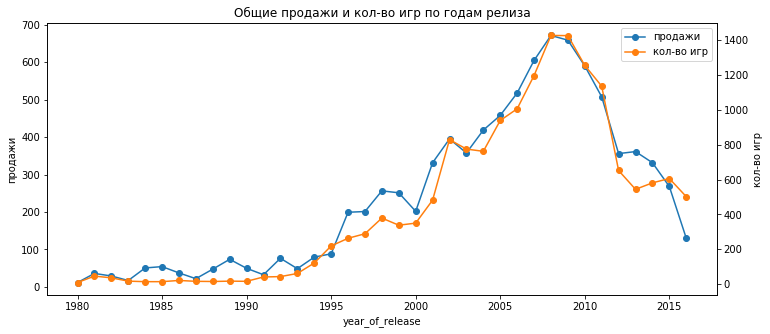

In [43]:
plot_name = 'Общие продажи и кол-во игр по годам релиза'
y_axis_right = 'кол-во игр'
y_axis_left = 'продажи'
rows_left_axis = [y_axis_left]
secondary_rows = [y_axis_right]
ax = pvt_sales_years.plot(y=rows_left_axis, kind='line', style='o-', grid=True, figsize=(12,5), title=plot_name)
ax1 = pvt_sales_years.plot(y=secondary_rows, kind='line', style='o-', ax=ax, secondary_y=True, mark_right=False)
ax = ax.set(ylabel=y_axis_left)
ax1 = ax1.set(ylabel=y_axis_right)

In [44]:
pvt_sales_years[['кол-во игр', 'продажи']].corr()

,кол-во игр,продажи
кол-во игр,1.000000,0.981411
продажи,0.981411,1.000000


Корреляция общих продаж и кол-ва игр по годам релиза близка к единице. Это же видно невооруженным глазом на графике. Такая взаимосвязь говорит о том, что подавляющий объем продаж выпускаемой игры, делается в течение очень короткого срока после выпуска - в течение года-двух. Это означает, что на продажи магазина "Стримчик" в 2017 году в основном будут влиять игры, выпущенные в 2016 и 2017 годах.

In [38]:
threshold_platform_size = 500 # порог отсечения совокупных продаж для выделения крупнейших платформ
platforms_sales = sales.groupby('platform')['total_sales'].sum()
platforms_biggest_list = platforms_sales[platforms_sales > threshold_platform_size].index.tolist()

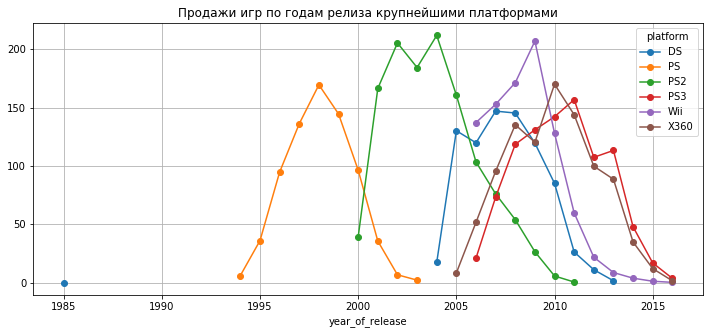

In [39]:
# сделаем срез из всех данных, содержащий данные только по крупнейшим платформам
sales_biggest_platforms = sales.query('platform in @platforms_biggest_list')
# сделаем сводную таблицу продаж по крупнейшим платформам и годам
sales_biggest_platforms_per_year = sales_biggest_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plot_name = 'Продажи игр по годам релиза крупнейшими платформами'
ax = sales_biggest_platforms_per_year.plot(style='o-', figsize=(12,5), grid=True, title=plot_name)

На графике представлены продажи игр по годам релиза различными платформами. Из этого графика хорошо видно, что платформа в среднем живет 10 лет, достигая максимума своей популярности примерно за 5 лет. Данный факт позволяет нам отобрать из полученных нами данных только актуальные. Дополнительно проверим наш вывод, полученный из графика по крупнейшим платформам.

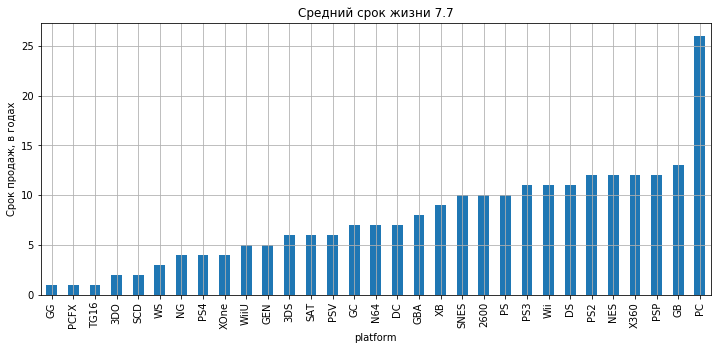

In [45]:
# для этого сделаем общую сводную таблицу продаж по платформам и годам релиза, 
# затем преобразуем ее в boolean - год, когда были продажи True, когда не было - False
# далее суммируем столбцы boolean и получаем кол-во годов, когда платформа хоть тчо-то продавала
pvt_sales_platforms_years = sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platforms_years_of_sales = pvt_sales_platforms_years.notna().sum().sort_values()
ax = platforms_years_of_sales.plot(kind='bar', figsize=(12,5), grid=True, title=f'Средний срок жизни {platforms_years_of_sales.mean():.1f}')
ax = ax.set(ylabel='Срок продаж, в годах')

Итак, полученный результат по всем платформам подтверждает наш вывод, сделанный на основе анализа графика продаж крупнешими платформами. Мы видим единственную платформу - PC, срок жизни которой заметно превосходит 10 лет. И это объяснимо - PC  слишком размытое понятие, которое вмещает в себя как минимум несколько поколений игрового железа. В других платформах разные поколения игровых приставок представлены как самостоятельные платформы.

Заметим, что мы совсем не учитывали краевой эффект - ясно, что есть платформы, которые стартовали после 2006 года, их "смерть" еще не наступила и срок жизни у них будет меньше 10 лет. Но нам это и не важно в настоящий момент - мы хотим быть уверенными, что нет большого кол-ва платформ, живущих более 10 лет.

In [40]:
# сделаем срез только актуальных данных
# для этого сначала сформируем список платформ, которые продавали в 2015 или 2016 годах
list_of_actual_platforms = sales[sales.year_of_release.isin([2015, 2016])]['platform'].unique().tolist()
list_of_actual_platforms

['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

In [41]:
# затем сделаем срез, включающий продажи полученного списка платформ игр после 2010 года выпуска
sales_actual = sales.query('platform in @list_of_actual_platforms and year_of_release > 2010')
sales_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3830 entries, 16 to 16443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   3830 non-null   int64  
 1   name                    3830 non-null   object 
 2   platform                3830 non-null   object 
 3   year_of_release         3830 non-null   int64  
 4   genre                   3830 non-null   object 
 5   na_sales                3830 non-null   float64
 6   eu_sales                3830 non-null   float64
 7   jp_sales                3830 non-null   float64
 8   other_sales             3830 non-null   float64
 9   critic_score            1791 non-null   float64
 10  user_score              2015 non-null   float64
 11  rating                  2219 non-null   object 
 12  total_sales             3830 non-null   float64
 13  year_from_name          169 non-null    float64
 14  year_from_name_minus_1  169 non-null  

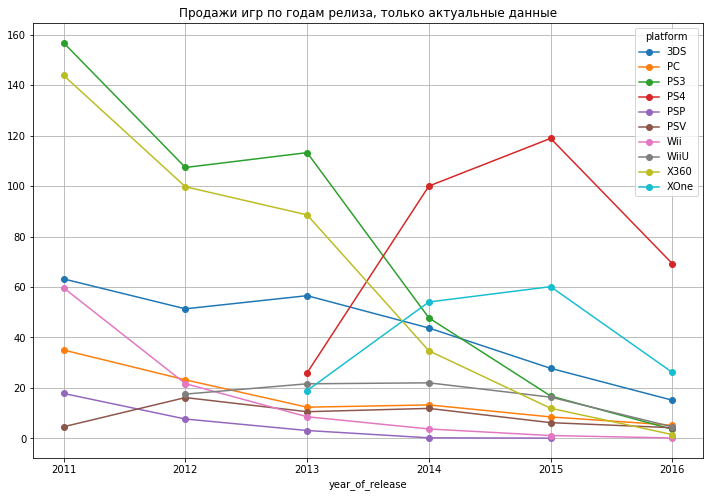

In [42]:
pvt_sales_actual_per_year = sales_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plot_name = 'Продажи игр по годам релиза, только актуальные данные'
ax = pvt_sales_actual_per_year.plot(style='o-', figsize=(12,8), grid=True, title=plot_name)

#### Выбор самых перспективных платформ

Для выбора самых потенциально прибыльных платформ мы будем использовать следующую методику:
- Нас интересуют продажи самых свежих игр (выпуска 2016 года), будем использовать данные по суммарным продажам игр этого года
- Нам необходимо учесть динамику различных платформ - естественно, нам интересны развивающиеся платформы, поэтому мы для каждой платформы посчитаем отношение общих продаж в 2015 году к общим продажам 2013 года
- Умножив продажи игр 2016 года на отношение продаж игр 2015 года к продажам игр 2013 года, получим коэффициент для ранжирования
- Отсортируем данные по убыванию полученного коэффициента для ранжирования и оставим топ платформы

In [43]:
pvt_sales_actual_platforms_all = (
    sales_actual
    .pivot_table(
        index='platform', 
        columns='year_of_release', 
        values='total_sales', 
        aggfunc='sum'))

In [44]:
pvt_sales_actual_platforms_all['rating_most_promising_platforms'] = (pvt_sales_actual_platforms_all[2015] 
                                            / pvt_sales_actual_platforms_all[2013] 
                                            * pvt_sales_actual_platforms_all[2016])

In [45]:
qnt_platforms_most_promising = 5 # здесь зададим общее кол-во самых потенциально прибыльных платформ
platforms_most_promising = pvt_sales_actual_platforms_all['rating_most_promising_platforms'].sort_values(ascending=False).head(qnt_platforms_most_promising)
platforms_most_promising

platform
PS4     316.807426
XOne     82.946255
3DS       7.434845
PC        3.613086
WiiU      3.473903
Name: rating_most_promising_platforms, dtype: float64

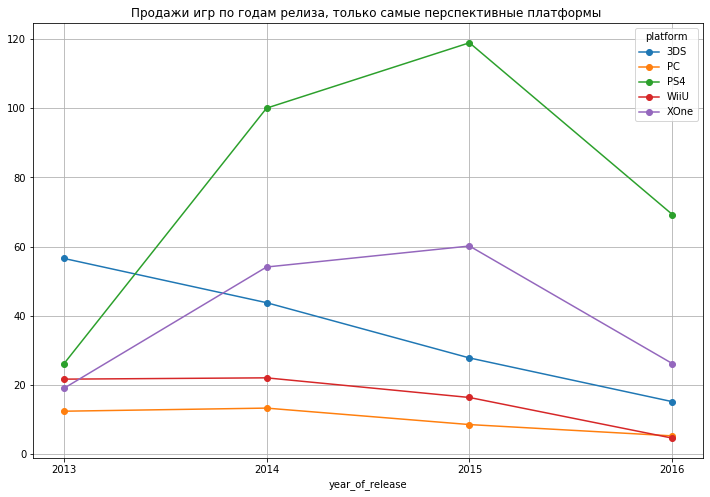

In [46]:
year_treshold = 2013 # здесь зададим год выпуска для данных по продажам самых потенциально прибыльных платформ
list_most_promising_platforms = platforms_most_promising.index.tolist()
sales_most_promising_platforms = sales_actual.query('platform in @list_most_promising_platforms and year_of_release >= @year_treshold')
pvt_sales_promising_per_year = sales_most_promising_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plot_name = 'Продажи игр по годам релиза, только самые перспективные платформы '
ax = pvt_sales_promising_per_year.plot(style='o-', figsize=(12,8), grid=True, title=plot_name)
ax.xaxis.set_major_locator(plt.MaxNLocator(2017-year_treshold))

### Анализ продаж для самых перспективных платформ

In [47]:
# ниже мы будем изучать только продажи выбранных нами ранее самых перспективных платформ за последние годы
sales_4_study = sales_most_promising_platforms # будем использовать данный синоним, на случай, если мы захотим изучить закономерности на более широком наборе данных

#### Анализ распределений по объему продаж внутри перспективных платформ

In [48]:
# посчитаем общие продажи по платформам, отсортируем список платформ и создадим аннотацию для использования в графиках  
total_sales_by_platform = sales_4_study.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
annotation = 'Total sales:\n'
for pltf in total_sales_by_platform.index:
    annotation += f'{pltf:.<6}{total_sales_by_platform[pltf]:.>6.2f} \n'
print(annotation)

Total sales:
PS4...314.14 
XOne..159.32 
3DS...143.25 
WiiU...64.63 
PC.....39.43 



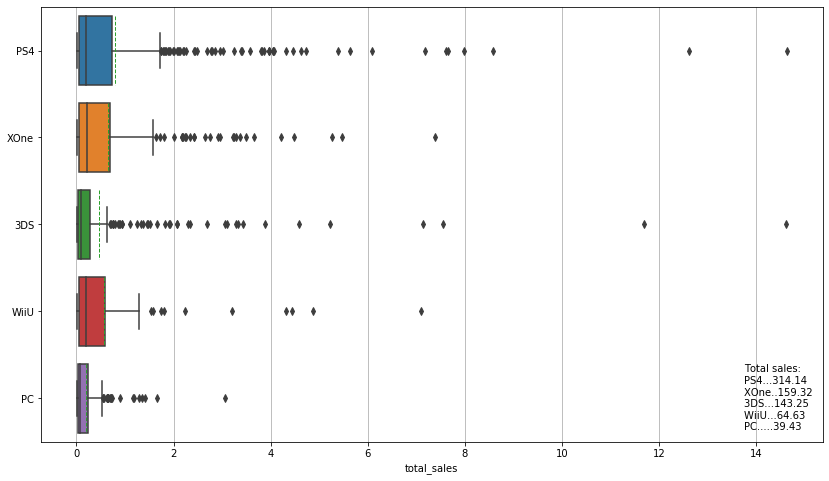

In [49]:
order = total_sales_by_platform.index
plt.figure(figsize=(14,8))
# plt.xlim(0,5)
ax = sns.boxplot(data=sales_4_study, y='platform', x='total_sales', showmeans=True, meanline=True, order=order)
# sns.swarmplot(data=sales_4_study, y='platform', x='total_sales', size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
n=ax.annotate(annotation, xy=(.9, .0), xycoords=ax.transAxes)
n=ax.set(ylabel="")

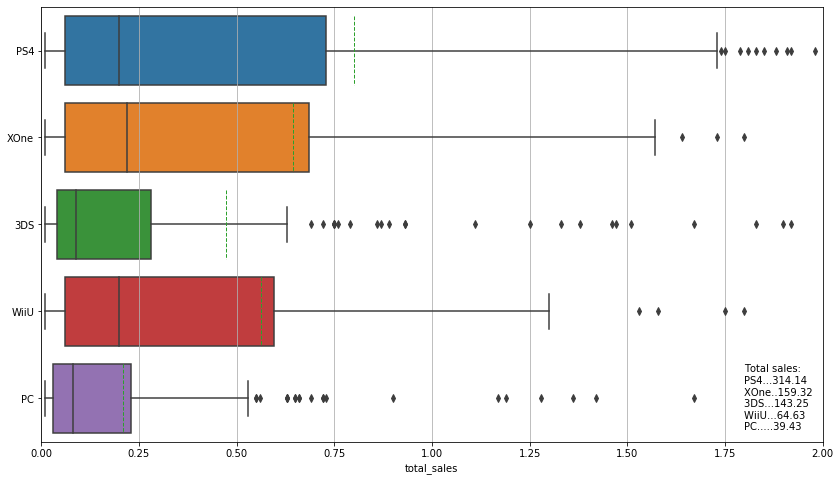

In [50]:
plt.figure(figsize=(14,8))
plt.xlim(0,2)
ax = sns.boxplot(data=sales_4_study, y='platform', x='total_sales', showmeans=True, meanline=True, order=order)
# sns.swarmplot(data=sales_4_study, y='platform', x='total_sales', size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
n=ax.annotate(annotation, xy=(.9, .0), xycoords=ax.transAxes)
n=ax.set(ylabel="")

#### Выводы:
- Распределения по продажам в каждой из выбранных нами платформ имеют ярко выраженную правостороннюю ассиметрию (имеют длинные хвосты в сторону больших продаж). В каждой платформе есть значительное кол-во выбросов больших продаж.
- За счет этого средние арифметические значительно превосходят медианные значения - средние арифметические на уровне или даже выше чем Q3 квартили. В двух платформах, PS4 и 3DS, среднее арифметическое выше Q3.
- По размеру "ящиков" платформы разбиваются на две группы - первая группа, условно, "лидеры", в которой медианное значение продаж в р-не 0.2, и вторая группа, в которой медианное значение менее 0.1.
- Выбивается из этого деления на лидеров и аутсайдеров платформа 3DS. В ней для 75% игр продажи составляют чуть более о.25, однако среднее арифметическое приближается к 0.5 (самое значительное превышение среднего арифметического над медианой), и платформа занимает 3е место по общим продажам, совсем немного уступая 2му месту, платформе XOne. Кроме того в платформе 3DS продажи по 2 играм превышают 10.0, такие же прибыльные игры есть только в платформе-лидере PS4.
- Лидер по продажам платформа PS4, в ней так же, как и в платформе 3DS, среднее арифметическое выше Q3 квартиля, и продажи в ней почти в 2 раза превышают продажи ближайшего конкурента, платформу XOne.
- Игры для платформы PC, занимающей последнее место в нашем рейтинге, имеют самые низкие продажи. За исключением пары десятков выбросов продажи каждой игры составляют 0.55 или меньше. Кроме того, в ней только одна игра (продажи около 3.0), для которой продажи составляют более 2.0

#### Взаимосвязь отзывов критиков и пользователей с продажами в пределах платформы

In [51]:
list_2_platforms = ['PS4', '3DS'] # изучим взаимосвязь рейтингов критиков и пользователей для двух платформ
list_cols_for_corr = ['total_sales', 'user_score', 'critic_score']
sales_to_study_2_platforms = sales_4_study.query('platform in @list_2_platforms')

corr_dict = {} 
# создадим словарь, в который запишем попарные корреляции для выбранных признаков для всех выбранных платформ
for platform, group_data in sales_to_study_2_platforms.groupby('platform'):
    corr_dict[platform] = group_data[list_cols_for_corr].corr()

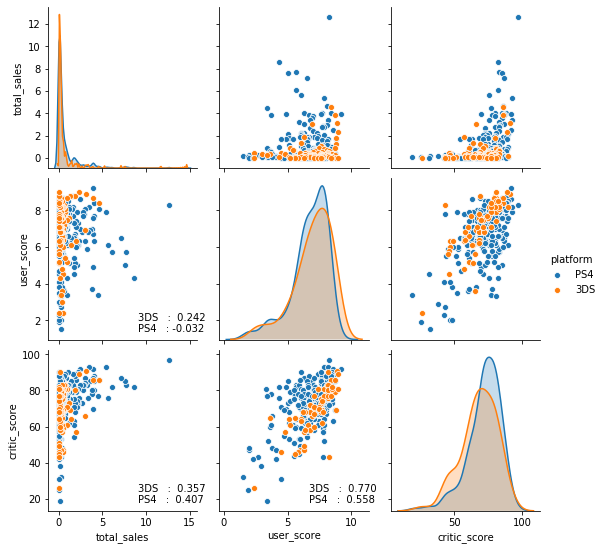

In [53]:
pg = sns.pairplot(sales_to_study_2_platforms, vars=list_cols_for_corr, hue='platform')
ax_list = pg.axes
x_0, y_0, y_heigh = (.6, .05, .07)
y_max = y_0 + (len(corr_dict) - 1) * y_heigh
for col, x_name in enumerate(list_cols_for_corr):
    for row, y_name in enumerate(list_cols_for_corr):
        if row > col:
            ax = ax_list[row][col]
            for i, platf_item in enumerate(corr_dict):
                correlation = corr_dict[platf_item].loc[y_name, x_name]
                y_i = y_max - i * y_heigh
                corr_str = f'{platf_item:<6}: {correlation:>6.3f}'
                ax.annotate(corr_str, xy=(x_0, y_i), xycoords=ax.transAxes)

# я видел warning, его не было в моем локальном jupyter
# вероятно, он как-то связан с окружением, поэтому я отправил работу на проверку несмотря на этот warning

In [54]:
# сделаем таблицу попарных корреляций выбранных нами столбцов для всех платформ
corr_df = sales_4_study.groupby('platform')[list_cols_for_corr].corr()
# corr_df

In [55]:
# сократим ненужные столбцы и строки для лучшего обзора полученной таблицы
# сначала перенесем значения корреляции между мнениями критиков и мнениями пользователей на место корреляции продажи vs продажи
for pltf in corr_df.index.get_level_values(0).unique():
    corr_df.loc[(pltf,'total_sales'), 'total_sales'] = corr_df.loc[(pltf,'critic_score'), 'user_score']

In [56]:
# затем переименуем столбцы
corr_df.columns = ['user_vs_critic', 'sales_vs_user', 'sales_vs_critic']

In [57]:
# транспонируем и удалим ненужные столбцы
corr_df = corr_df.T
corr_df.drop(columns=['user_score','critic_score'], level=1, inplace=True)

In [58]:
# наконец, удалим ненужный уровень индекса
corr_df.columns = corr_df.columns.droplevel(level=1)
corr_df

platform,3DS,PC,PS4,WiiU,XOne
user_vs_critic,0.769536,0.429562,0.557654,0.721313,0.472462
sales_vs_user,0.241504,-0.093842,-0.031957,0.419330,-0.068925
sales_vs_critic,0.357057,0.196030,0.406568,0.376415,0.416998


#### Выводы:
- Во всех платформах есть заметная линейная корреляция между продажами и мнением критиков. Минимальная корреляция в платформе PC - коэффициент 0.2, у всех остальных коэффициенты корреляции в диапазоне от 0.36 до 0.42
- Только в двух платформах - 3DS и WiiU (0.24 и 0.42) есть заметная линейная корреляция между продажами и мнением пользователей. В трех других платформах - PC, PS4, XOne - коэффициент линейной корреляции между продажами и мнением пользователей близок к нулю.
- При этом именно для платформ 3DS и WiiU корреляция между мнением пользователей и мнением критиков является сильной, коэффициенты линейной корреляции равны 0.77 и 0.72

#### Анализ по жанрам

In [59]:
pvt_sales_4_study_genre = (
    sales_4_study
    .pivot_table(
        index='genre', 
        values='total_sales',
        aggfunc=['count','sum', 'mean', 'median'],
        margins=True
    )
)
pvt_sales_4_study_genre.columns = ['кол-во игр', 'общие продажи', 'среднее', 'медианное']
pvt_sales_4_study_genre

,кол-во игр,общие продажи,среднее,медианное
genre,,,,
Action,443,189.46,0.427675,0.110
Adventure,83,13.03,0.156988,0.060
Fighting,38,25.50,0.671053,0.155
Misc,93,30.81,0.331290,0.120
Platform,49,33.75,0.688776,0.260
Puzzle,14,3.07,0.219286,0.085
Racing,57,30.26,0.530877,0.120
Role-Playing,150,113.71,0.758067,0.190
Shooter,120,164.27,1.368917,0.495


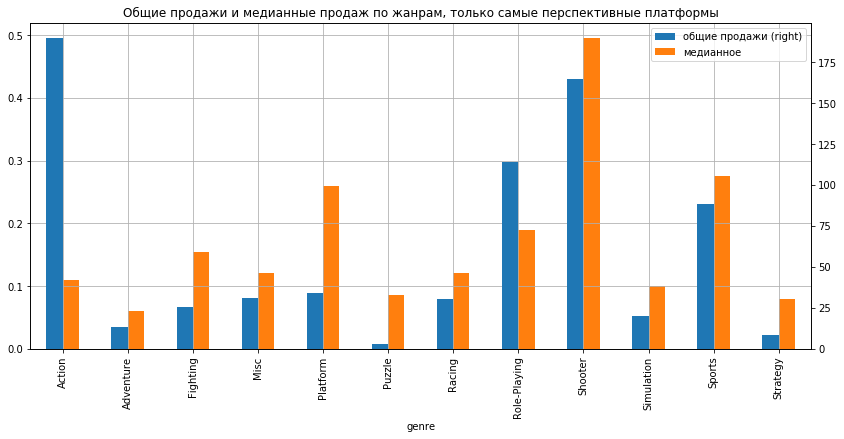

In [60]:
# в силу очень значительной ассиметрии распределения по продажам 
# для сравнения выведем на графике общие продажи и медианные средние
plot_name = 'Общие продажи и медианные продаж по жанрам, только самые перспективные платформы'
rows_to_plot = ['общие продажи', 'медианное']
secondary_rows = ['общие продажи']
pvt_sales_4_study_genre = pvt_sales_4_study_genre.drop(index='All')
ax = pvt_sales_4_study_genre.plot(y=rows_to_plot, figsize=(14,6), kind='bar', secondary_y=secondary_rows, title=plot_name, grid=True)

#### Выводы:
- Жанр Action, лидер по общим продажам, не является прибыльным жанром для отдельной игры. Средние доходы игр в этом жанре не входят даже в пятерку. Это же означает, что в данном жанре максимальное кол-во игр
- Жанр Shooter, занимающий второе место по общим продажам, является лидером по средним доходам игр.
- Жанры Puzzle, Strategy  и Adventure, имюещие самые низкие продажи,  имеют и самые низкие медианные доходы.

### Портрет пользователя региона

In [61]:
# ниже мы будем изучать только актуальные продажи 
sales_4_study = sales_actual # будем использовать данный синоним, на случай, если мы захотим изучить закономерности на другом наборе данных

####  Популярность платформ в разных регионах

In [62]:
# создадим функцию, которая выводит круговую диаграмму 5 лидеров любого столбца продаж по какому-либо категориальному столбцу
def pie_5_leaders_expose(data, by_col, income_col, ax):
    pvt = data.groupby(by_col)[income_col].sum().sort_values(ascending=False).head(5) 
    list_big_5 = pvt.index.tolist() # формируем список 5 крупнейших [платформ, жанров, ...] по продажам в соотв. регионе или total
    filter = data[by_col].isin(list_big_5)
    data.loc[~filter, by_col] = 'others' # другие [платформы, жанры, ...] переименовываем в others
    pvt = data.groupby(by_col)[income_col].sum()
    ax=pvt.plot(kind='pie', autopct='%.1f%%', ax=ax)
    ax.set_ylabel('')

# создадим функцию, которая выводит в одну строку круговые диаграммы лидеров для списка категориальных столбцов  
def region_expose(data, region_col, region_name, group_col_list):
    data_copy = data.copy()
    fig, ax_list = plt.subplots(nrows=1, ncols=len(group_col_list), figsize=(16,6))
    fig.suptitle(f'Продажи в регионе: {region_name}')
    for i, group_col in enumerate(group_col_list):
        try:
            pie_5_leaders_expose(data_copy, group_col, region_col, ax_list[i])
        except TypeError:
            pie_5_leaders_expose(data_copy, group_col, region_col, ax_list)

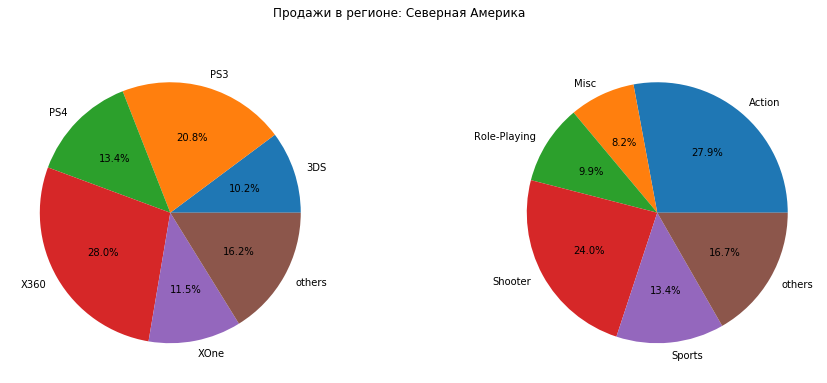

In [63]:
region_expose(sales_4_study, 'na_sales', 'Северная Америка', ['platform', 'genre'])    

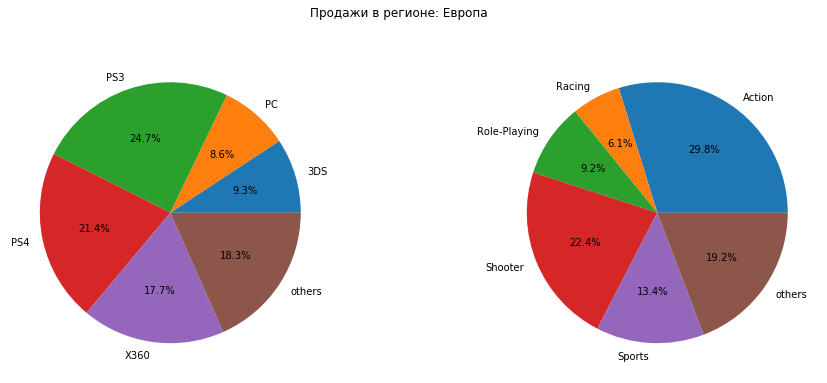

In [64]:
region_expose(sales_4_study, 'eu_sales', 'Европа', ['platform', 'genre'])

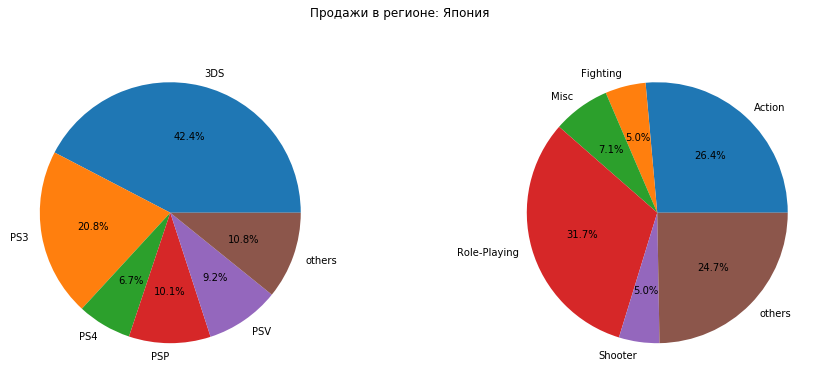

In [65]:
 region_expose(sales_4_study, 'jp_sales', 'Япония', ['platform', 'genre'])

Мы видим, что лидеры-платформы и лидеры-жанры в каждом регионе свои. Для бОльшей наглядности выведем на одном графике продажи по регионам и платформам, причем отобразим не абсолютные значения продаж, а доли

In [66]:
list_cols_regions = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales']
def sales_shares_in_regions(data, col_by):
    pvt_sales_regions_col_by = (
        data
        .pivot_table(
            index=col_by,
            values=list_cols_regions,
            aggfunc='sum',
            margins=True
        )
    )
    pvt_sales_regions_col_by = pvt_sales_regions_col_by / pvt_sales_regions_col_by.loc['All', :] * 100
    pvt_sales_regions_col_by.drop('All', inplace=True)
    return pvt_sales_regions_col_by.round(1)


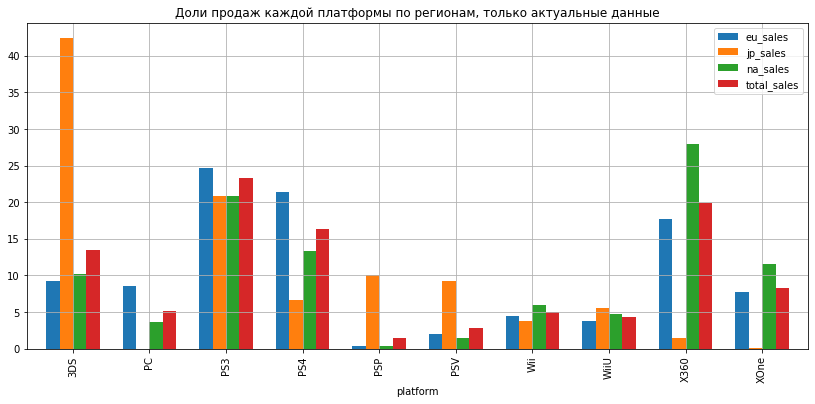

In [67]:
plot_name = 'Доли продаж каждой платформы по регионам, только актуальные данные'
ax = sales_shares_in_regions(sales_4_study, 'platform').plot(figsize=(14,6), kind='bar', width=0.7, grid=True, title=plot_name)

#### Выводы:
На последнем графике хорошо видна популярность платформ в разных регионах:
-  Мы видим несколько платформ, популярные во всех регионах (имеют примерно одинаковые доли продаж в каждом регионе). Лидер по общим продажам, платформа PS3, занимает более 20% продаж в каждом регионе, занимая 1е место в Европе, 2е место в Японии и в Сев. Америке.
- Платформа X360 успешна лишь в 2 регионах - Сев. Америке (1е место) и Европе (3е место), однако этого достаточно для глобального 2 места
- Платформа 3DS успешна только в Японии (1е место) и это обеспечивает ей глобальное 4е место
- Платформа PS4 глобально занимает 3е место, благодаря 2му месту в Европе и 3му месту Сев. Америке, при этом в Японии у нее лишь 5е место.
- Следует отметить, что Япония выделяется своей уникальностью. Из 5 японских лидеров только 2 платформы (PS3 и PS4) являются популярными и в других регионах. 3DS, как уже было указано, являясь лидером в Японии, глобально занимает всего лишь 4е место. Платформы же PSP (Япония - 3е место) и PSV (Япония - 4е место) не входят в пятерку лидеров по всем регионам.
- Платформа XOne глобально занимает 5е место, при этом в Японии ее доля близка к 0, зато она 4я в Сев. Америке и 5-6я в Европе.

#### Популярность жанров в различных регионах

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,29.8,26.4,27.9,28.7
Adventure,2.1,4.9,1.8,2.3
Fighting,2.5,5.0,3.9,3.5
Misc,5.7,7.1,8.2,6.9
Platform,4.5,4.9,4.6,4.5
Puzzle,0.5,1.2,0.3,0.4
Racing,6.1,2.4,3.8,4.5
Role-Playing,9.2,31.7,9.9,12.3
Shooter,22.4,5.0,24.0,21.0


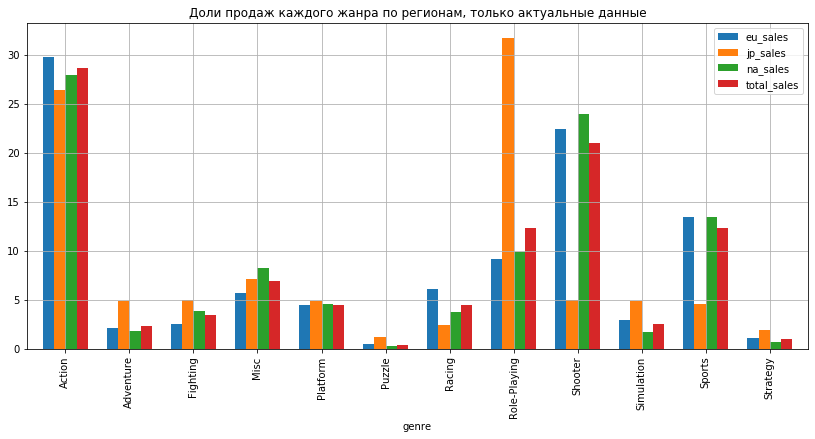

In [68]:
plot_name = 'Доли продаж каждого жанра по регионам, только актуальные данные'
data = sales_shares_in_regions(sales_4_study, 'genre')
display(data)
ax = data.plot(figsize=(14,6), kind='bar', width=0.7, grid=True, title=plot_name)

#### Выводы:
- Популярность жанров в Японии сильно отличается от популярности жанров в Европе и Сев. Америке. Популярности жанров в Европе и Сев. Америке в целом очень похожи.
- Самый популярный жанр по всем регионам - Action. Этот же жанр является самым популярным в Европе и Сев. Америке, однако в Японии он занимает второе место.
- Самый популярный в Японии жанр - Role-Playing (доля почти 32%), глобально делит лишь 3-4е место с жанром Sports c долей 12.3%.
- Далее после лидера Action в порядке убывания жанры - Shooter (в р-не 21-24% глобально и в Европе, Сев. Америке) и Sports (12.3% глобально и 13.4% в Европе и Сев. Америке). Эти жанры в таком же порядке занимают 2е и 3е места в Европе и Сев. Америке. В Японии эти жанры занимают лишь примерно по 5%.
- Глобальное 5е место с долей примерно 7% занимает жанр Misc. Он имеет примерно одинаковую долю в 7% во всех регионах, в Японии этого достаточно для 3го места.
- Пятое место в Европе у жанра Racing с долей 6.1%, однако мЕньшая популярность в Сев. Америке и Японии не позволяет этому жанру войти в 5 глобально.

#### Влияние рейтинга ESRB на продажи

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
E,25.2,33.7,23.3,24.7
E10+,13.9,10.5,16.5,14.8
M,45.7,24.5,44.5,43.8
T,15.2,31.2,15.7,16.7


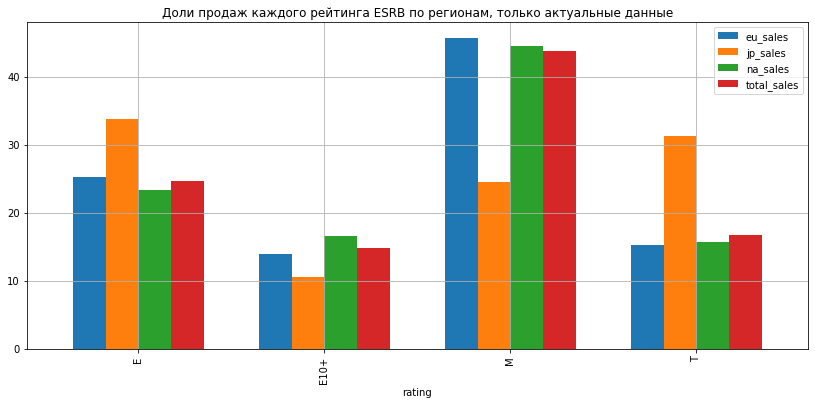

In [69]:
plot_name = 'Доли продаж каждого рейтинга ESRB по регионам, только актуальные данные'
data = sales_shares_in_regions(sales_4_study, 'rating')
display(data)
ax = data.plot(figsize=(14,6), kind='bar', width=0.7, grid=True, title=plot_name)

In [70]:
# Для бОльшей наглядности сделанных выводов объединим рейтинги E10+ и T (=13+) в один рейтинг 
sales_4_study_copy = sales_4_study.copy()
filter = sales_4_study_copy['rating'].isin(['E10+', 'T'])
sales_4_study_copy['rating_amended'] = sales_4_study_copy['rating'].where(~filter, 'T10+')

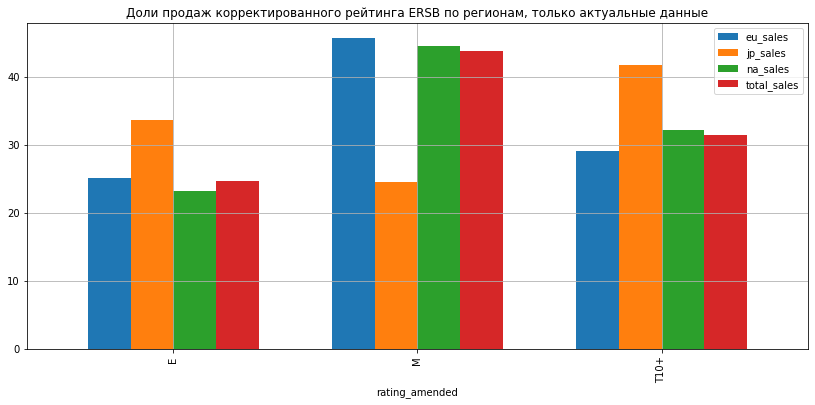

In [71]:
plot_name = 'Доли продаж корректированного рейтинга ERSB по регионам, только актуальные данные'
ax = sales_shares_in_regions(sales_4_study_copy, 'rating_amended').plot(figsize=(14,6), kind='bar', width=0.7, grid=True, title=plot_name)

#### Выводы:
- В Японии игры для взрослых (17+) менее популярны чем в Европе и Сев. Америке. За счет этого игры для детей и подростков в Японии относительно более популярны, чем в других регионах.
- Игры для взрослых занимают самую большую долю продаж в Сев. Америке и Европе (доля около 45% в каждом из этих регионов) и это обеспечивает самую большую долю продаж глобально - почти 44%.

### Проверка гипотез

In [72]:
# ниже мы будем изучать только актуальные продажи 
sales_4_study = sales_actual.copy() # будем использовать данный синоним, на случай, если мы захотим изучить закономерности на другом наборе данных
col_for_comparising = 'user_score'
sales_4_study.dropna(subset = [col_for_comparising], inplace=True)

In [73]:
# нам предстоит проверить две гипотезы о равенстве пользовательских рейтингов, 
# причем альтернативные гипотезы в обоих случаях: "рейтинги не равны"
# создадим функцию для проверки гипотез этого типа:
def test_parity(sample_1, sample_2, name_s1, name_s2, equality_var, alpha=.05):
    print(f'Средний пользовательский рейтинг {name_s1:<16}: {sample_1.mean():.2f}')
    print(f'Средний пользовательский рейтинг {name_s2:<16}: {sample_2.mean():.2f}')
    print(f"Нулевая гипотеза: средние пользовательские рейтинги {name_s1} и {name_s2} одинаковые")
    print('Альтернативная гипотеза: средние пользовательские рейтинги не равны')
    results = st.ttest_ind(sample_1, sample_2, equal_var=equality_var)
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [74]:
def get_selection(data, col, list_of_2_values):
    arrays_dict = {}
    selection_from_data = data[data[col].isin(list_of_2_values)]
    fig, ax = plt.subplots(figsize=(16,6))
    for value, group_data in selection_from_data.groupby(col):
        arrays_dict[value] = group_data[col_for_comparising]
        sns.distplot(group_data[col_for_comparising], ax=ax, bins=50)
    return arrays_dict

#### Сравнение пользовательских рейтингов платформ Xbox и One.

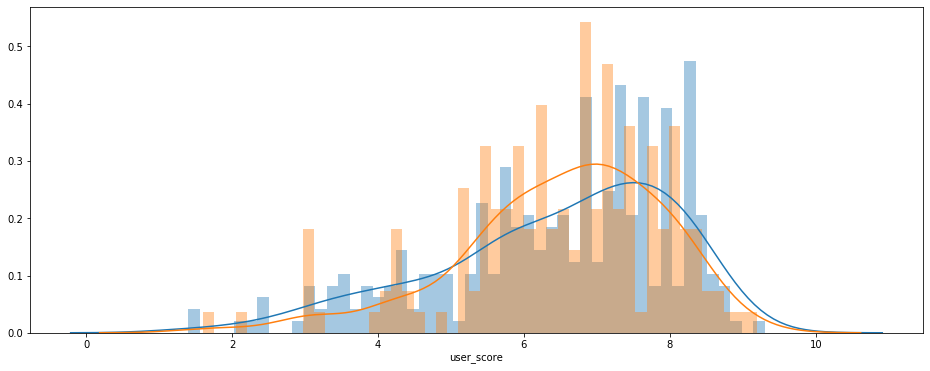

In [75]:
arrays_dict = get_selection(sales_4_study, 'platform', ['XOne', 'PC'])

In [76]:
test_parity(arrays_dict['XOne'], arrays_dict['PC'], 'платформы XOne', 'платформы PC', True)

Средний пользовательский рейтинг платформы XOne  : 6.52
Средний пользовательский рейтинг платформы PC    : 6.45
Нулевая гипотеза: средние пользовательские рейтинги платформы XOne и платформы PC одинаковые
Альтернативная гипотеза: средние пользовательские рейтинги не равны
p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


#### Выводы:
- Средние пользовательские рейтинги в платформах PC и Xbox One отличаются друг от друга незначительно в имеющихся у нас выборках.
- Был проведен тест Стьюдента, полученное значение p-value 0.6267602271422398 говорит о том, что наблюдаемое отличие в средних по выборке с вероятностью почти 63% было случайным.
- Тест Стьюдента не позволил отбросить нулевую гипотезу о равенстве средних.

#### Сравнение средних пользовательских рейтингиов жанров Action и Sports.

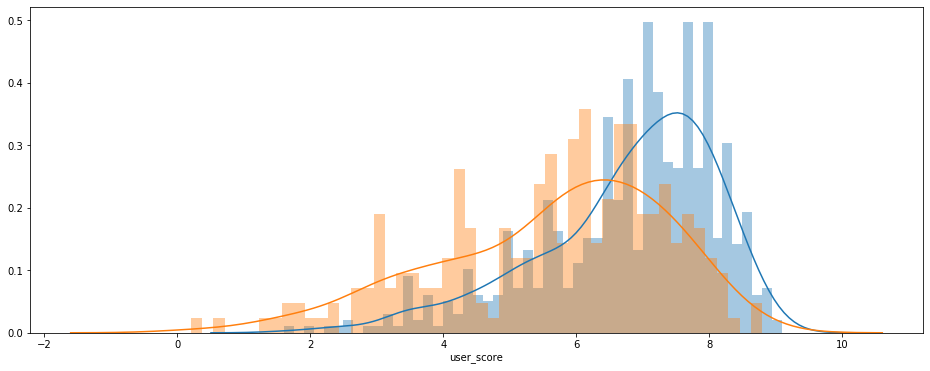

In [77]:
arrays_dict = get_selection(sales_4_study, 'genre', ['Action', 'Sports'])

In [78]:
test_parity(arrays_dict['Action'], arrays_dict['Sports'], 'жанра Action', 'жанра Sports', True)

Средний пользовательский рейтинг жанра Action    : 6.77
Средний пользовательский рейтинг жанра Sports    : 5.65
Нулевая гипотеза: средние пользовательские рейтинги жанра Action и жанра Sports одинаковые
Альтернативная гипотеза: средние пользовательские рейтинги не равны
p-значение: 9.543289260633076e-24
Отвергаем нулевую гипотезу


#### Выводы:
- Средние пользовательские рейтинги для игр жанров Action и Sports отличаются друг от друга более чем на 1 в имеющихся у нас выборках.
- Был проведен тест Стьюдента, полученное значение p-value говорит о том, что наблюдаемое отличие в средних по выборкам может быть случайным с чрезвычайно низкой вероятностью порядка 10 в степени минус 23  
- Отвергаем нулевую гипотезу о равенстве средних - с очень высокой степенью вероятности средние пользователские рейтинги игр в выбранных нами жанрах разные.

# Общие выводы:

### Подготовка данных.
- Предоставлены данные о 16715 играх. Данные о продажах в регионах и платформах есть по всем играм. В столбце год выпуска есть менее 2% пропусков. Есть значительное число пропусков (в р-не 50%) в столбцах рэйтингов.
- Я не стал заполнять пропуски в столбцах рейтингов, используя какое-либо правило - среднее, медианное по всем или по каким-либо группам. Причина - пропуски отражают либо реальное отсутствие данных, либо недостаток данных для объективного рейтинга. Любое заполнение пропусков в таком слуае ничего не даст с точки зрения анализа, в лучшем случае лишь отразит логику нашего заполнения пропусков. 
- Я заменил в столбце user_score большое кол-во (около 25% от всех непустых) значений tbd (to be determined) на адекватное NaN, это позволило преобразовать данные в столбце к float и, значит, появилась возможность количественного анализа данных с использованием данного столбца.
- Я произвел замены небольшого количества выявленных ошибочных значений в поле ESRB рэйтинга.
- Я попытался заполнить пропуски в столбце год релиза, используя год в названии игры. Анализ однако продемонстрировал, что просто взять год из названия невозможно, достаточно часто полученный из названия год не совпадает с годом релиза и простой сдвиг не решает проблему. В результате я оставил пропуски в этом столбце и удалил все строки с пропущенным годом релиза, поскольку эти данные критичны для нашего последующего анализа и удаление пропусков позволило преобразовать тип данных в этом столбце к целым числам. 
- Я обнаружил две пары дубликатов - данные по одной и той же игре, одного и того же года выпуска, для одной и той же платформы. Я объединил данные по продажам в каждой паре и удалил дубликаты.

### Выбор актуальных данных.
- Корреляция общих продаж и кол-ва игр по годам релиза близка к единице.  Такая взаимосвязь говорит о том, что подавляющий объем продаж выпускаемой игры делается в течение очень короткого срока после выпуска - в течение года-двух.
- Анализ продаж крупнейшими платформами игр по годам релиза позволил определить средний срок жизни платформ - в среднем он составляет 10 лет. Каждая платформа достигает максимума своей популярности примерно за 5 лет.
- В результате я выбрал актуальные данные следующим образом: оставил продажи после 2010 года и только для тех платформ, которые продавали игры 2015 или 2016 года.

### Выбор потенциально самых прибыльных платформ.
Используя проведенный на предыдущем этапе анализ, я сформировал следующую методику выбора самых потенциально прибыльных платформ:
- Поскольку нас интересуют продажи самых свежих игр (выпуска 2016 года), я взял данные по суммарным продажам игр этого года.
- Нам необходимо учесть динамику различных платформ - естественно, нам интересны развивающиеся платформы, поэтому для каждой платформы я посчитал отношение общих продаж в 2015 году к общим продажам 2013 года.
- Умножив продажи игр 2016 года на отношение продаж игр 2015 года к продажам игр 2013 года, получил коэффициент для ранжирования
- Отсортировал данные по убыванию полученного коэффициента для ранжирования и оставил топ платформы:
 - PS4     
 - XOne    
 - 3DS      
 - PC      
 - WiiU

### Анализ продаж для самых перспективных платформ.

#### Анализ распределений по объему продаж:
- Распределения по продажам в каждой из выбранных нами платформ имеют ярко выраженную правостороннюю ассиметрию (имеют длинные хвосты в сторону больших продаж). В каждой платформе есть значительное кол-во выбросов больших продаж.
- За счет этого средние арифметические значительно превосходят медианные значения - средние арифметические на уровне или даже выше чем Q3 квартили. В двух платформах, PS4 и 3DS, среднее арифметическое выше Q3.
- По размеру "ящиков" платформы разбиваются на две группы - первая группа, условно, "лидеры", в которой медианное значение продаж в р-не 0.2, и вторая группа, в которой медианное значение менее 0.1.
- Выбивается из этого деления на лидеров и аутсайдеров платформа 3DS. В ней для 75% игр продажи составляют чуть более о.25, однако среднее арифметическое приближается к 0.5 (самое значительное превышение среднего арифметического над медианой), и платформа занимает 3е место по общим продажам, совсем немного уступая 2му месту, платформе XOne. Кроме того в платформе 3DS продажи по 2 играм превышают 10.0, такие же прибыльные игры есть только в платформе-лидере PS4.
- Лидер по продажам платформа PS4, в ней так же, как и в платформе 3DS, среднее арифметическое выше Q3 квартиля, и продажи в ней почти в 2 раза превышают продажи ближайшего конкурента, платформу XOne.
- Игры для платформы PC, занимающей последнее место в нашем рейтинге, имеют самые низкие продажи. За исключением пары десятков выбросов продажи каждой игры составляют 0.55 или меньше. Кроме того, в ней только одна игра (продажи около 3.0), для которой продажи составляют более 2.0.

#### Взаимосвязь отзывов критиков и пользователей с продажами:
- Во всех платформах есть заметная линейная корреляция между продажами и мнением критиков. Минимальная корреляция в платформе PC - коэффициент 0.2, у всех остальных коэффициенты корреляции в диапазоне от 0.36 до 0.42
- Только в двух платформах - 3DS и WiiU (0.24 и 0.42) есть заметная линейная корреляция между продажами и мнением пользователей. В трех других платформах - PC, PS4, XOne - коэффициент линейной корреляции между продажами и мнением пользователей близок к нулю.
- При этом именно для платформ 3DS и WiiU корреляция между мнением пользователей и мнением критиков является сильной, коэффициенты линейной корреляции равны 0.77 и 0.72

#### Анализ продаж по жанрам:
- Жанр Action, лидер по общим продажам, не является прибыльным жанром для отдельной игры. Средние доходы игр в этом жанре не входят даже в пятерку. Это же означает, что в данном жанре представлено максимальное кол-во игр
- Жанр Shooter, занимающий второе место по общим продажам, является лидером по средним доходам игр.
- Жанры Puzzle, Strategy  и Adventure, имеющие самые низкие продажи,  имеют и самые низкие медианные доходы.

### Портрет пользователя региона.
Анализ проводился по актуальным данным.

####  Популярность платформ в разных регионах:
-  Я выявил несколько платформ, популярных во всех регионах (имеют примерно одинаковые доли продаж в каждом регионе). Лидер по общим продажам, платформа PS3, занимает более 20% продаж в каждом регионе, занимая 1е место в Европе, 2е место в Японии и в Сев. Америке.
- Платформа X360 успешна лишь в 2 регионах - Сев. Америке (1е место) и Европе (3е место), однако этого достаточно для глобального 2го места.
- Платформа 3DS успешна только в Японии (1е место) и это обеспечивает ей глобальное 4е место.
- Платформа PS4 глобально занимает 3е место, благодаря 2му месту в Европе и 3му месту Сев. Америке, при этом в Японии у нее лишь 5е место.
- Следует отметить, что Япония выделяется своей уникальностью. Из 5 японских лидеров только 2 платформы (PS3 и PS4) являются популярными и в других регионах. 3DS, как уже было указано, являясь лидером в Японии, глобально занимает всего лишь 4е место. Платформы же PSP (Япония - 3е место) и PSV (Япония - 4е место) не входят в пятерку лидеров по всем регионам.
- Платформа XOne глобально занимает 5е место, при этом в Японии ее доля близка к 0, зато она 4я в Сев. Америке и 5-6я в Европе.

#### Популярность жанров в различных регионах:
- Популярность жанров в Японии сильно отличается от популярности жанров в Европе и Сев. Америке. Популярности жанров в Европе и Сев. Америке в целом очень похожи.
- Самый популярный жанр по всем регионам - Action. Этот же жанр является самым популярным в Европе и Сев. Америке, однако в Японии он занимает второе место.
- Самый популярный в Японии жанр - Role-Playing (доля почти 32%), глобально делит лишь 3-4е место с жанром Sports c долей 12.3%.
- Далее после глобального лидера Action в порядке убывания жанры - Shooter (в р-не 21-24% глобально и в Европе, Сев. Америке) и Sports (12.3% глобально и по 13.4% в Европе и Сев. Америке). Эти жанры в таком же порядке занимают 2е и 3е места в Европе и Сев. Америке. В Японии эти жанры занимают лишь примерно по 5%.
- Глобальное 5е место с долей примерно 7% занимает жанр Misc. Он имеет примерно одинаковую долю в 7% во всех регионах, в Японии этого достаточно для 3го места.
- Пятое место в Европе у жанра Racing с долей 6.1%, однако мЕньшая популярность в Сев. Америке и Японии не позволяет этому жанру войти в 5ку глобально.

#### Влияние рейтинга ESRB на продажи:
- В Японии игры для взрослых (17+) менее популярны чем в Европе и Сев. Америке. За счет этого игры для детей и подростков в Японии относительно более популярны, чем в других регионах.
- Игры для взрослых занимают самую большую долю продаж в Сев. Америке и Европе (доля около 45% в каждом из этих регионов) и это обеспечивает самую большую долю продаж глобально - почти 44%.

### Проверка гипотез.

#### Сравнение пользовательских рейтингов платформ Xbox и One:
- Средние пользовательские рейтинги в платформах PC и Xbox One отличаются друг от друга незначительно в имеющихся у нас выборках.
- Был проведен тест Стьюдента, полученное значение p-value 0.6267602271422398 говорит о том, что наблюдаемое отличие в средних по выборке с вероятностью почти 63% было случайным.
- Тест Стьюдента не позволил отбросить нулевую гипотезу о равенстве средних.

#### Сравнение средних пользовательских рейтингиов жанров Action и Sports:
- Средние пользовательские рейтинги для игр жанров Action и Sports отличаются друг от друга более чем на 1 в имеющихся у нас выборках.
- Был проведен тест Стьюдента, полученное значение p-value говорит о том, что наблюдаемое отличие в средних по выборкам может быть случайным с чрезвычайно низкой вероятностью порядка 10 в степени минус 23  
- Тест Стьюдента позволил отбросить нулевую гипотезу о равенстве средних - с очень высокой степенью вероятности средние пользователские рейтинги игр в выбранных нами жанрах разные.



